In [20]:
#import sys, os
#sys.path.insert(0, os.path.expanduser('~/.local/lib/python3.8/site-packages'))

#import glob 
#import cremerlab.hplc

#load required pacakges (as always)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
#import colorcet as cc
from scipy.integrate import odeint #this is the module to solve ODEs
%matplotlib inline
# Load the scipy module
import scipy.stats 
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import json
import seaborn as sns

#import met_brewer
#colors = met_brew(name="Egypt", n=4, brew_type="discrete")
colors=["#dd5129","#0f7ba2","#43b284","#fab255"] #met_brewer egypt
#colores used to indicate different carbon sources
colorlistcarbhighlight=["#d95f02","b","#7570b3","#e7298a"] #"#1b9e77"
carbhighlight=["LB","Glucose","Succinate","Acetate"]

palette = ['#9df2f2','#009292','#ffb6db','#c48efa','#6db6ff','#b6dbff','#cf8d4c','#fca651','#56bf56','#ffff6d']
carsource_list=["LB","Glu+CAA","Gly+CAA","Glucose","Maltose","Glycerol","Succinate","Fructose","Acetate"]
colorlistcarb=[colors[0],"gray","gray",colors[1],"gray","gray",colors[2],"gray",colors[3]]
alpha=0.5 #transparancy colors

In [21]:
#read in data

In [22]:
data=pd.read_csv("../../data/results_summary.csv",skiprows=1)
display(data.head())

,Strain,Date,Buffer,Experiment,carbon_source,growth_rate,carbon_source_2,growth_rate_2,glu_consumption,acetate_secretion,...,Succinate_consumption,glycerol_consumption,galactose_consumption,glu+CAA_consumption,glu+CAA+ACGU_consumption,front_speed,total_RNA,total_protein,R/P,cAMP
0,ECOR01,NaN,LB,Growth rate expt_II,LB,2.463350,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ECOR01,NaN,LB,Growth rate expt_I,LB,2.487041,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ECOR01,NaN,MOPS,Growth rate expt_I,Glu+CAA+ACGU,2.024798,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ECOR01,NaN,MOPS,soft_agar expt_I,Glycerol,0.794200,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.6948,NaN,NaN,NaN,NaN
4,ECOR01,NaN,MOPS,soft_agar expt_I,Glu+CAA,1.478800,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


['ECOR01' 'ECOR02' 'ECOR09' 'ECOR13' 'ECOR15' 'ECOR24' 'ECOR26' 'ECOR28'
 'ECOR35' 'ECOR36' 'ECOR38' 'ECOR39' 'ECOR41' 'ECOR42' 'ECOR51' 'ECOR53'
 'ECOR54' 'ECOR55' 'ECOR59' 'ECOR61' 'ECOR63' 'NCM3722']


'CV meas. LB'

'CV meas. Glu+CAA+ACGU'

'CV meas. Glycerol'

'CV meas. Glu+CAA'

'CV meas. Gly+CAA'

'CV meas. Glucose'

'CV meas. Acetate'

'CV meas. Maltose'

'CV meas. Fructose'

'CV meas. Succinate'

'CV meas. Mixed carbon'

'CV meas. Galactose'

'CV meas. Lactose'

'CV meas. fru_glu'

'CV meas. mal_glu'

'CV meas. fru_mal'

'CV growth rate measurements across media and mean across media'

array([0.03203959, 0.01774772, 0.10117909, 0.0810941 , 0.03590964,
       0.0792676 , 0.08662007, 0.03180571, 0.10387722,        nan,
       0.04900953, 0.02119704,        nan,        nan,        nan,
              nan])

0.0581588475027492

'CV meas. LB'

0.03203958781567261

'CV meas. Glucose'

0.07926759702723676

'CV meas. Acetate'

0.08662007007070041

'CV meas. Succinate'

nan

carbon_source
Acetate         0.293242
Fructose        0.572340
Galactose       0.436196
Glu+CAA         1.247835
Glu+CAA+ACGU    1.798643
Glucose         0.748892
Gly+CAA         1.173493
Glycerol        0.674125
LB              2.505696
Lactose         0.656264
Maltose         0.704571
Mixed carbon    0.893906
Succinate       0.584609
fru_glu         0.696293
fru_mal         0.496829
mal_glu         0.625437
Name: growth_rate, dtype: float64

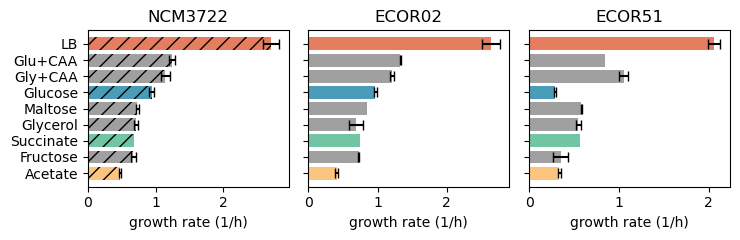

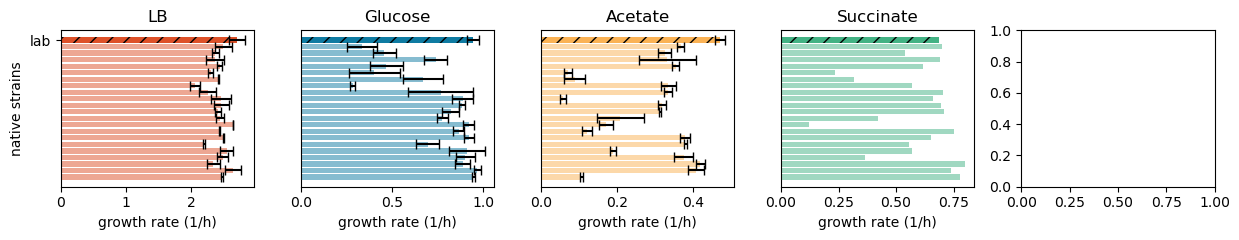

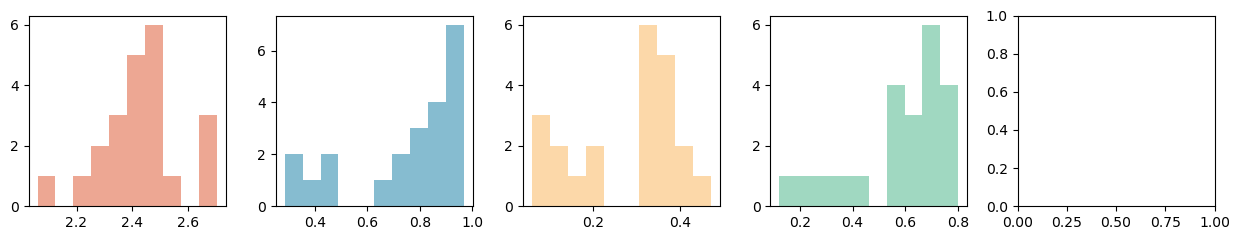

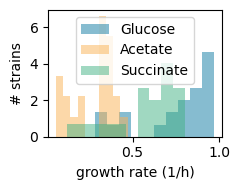

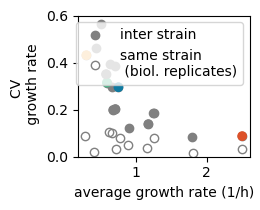

In [58]:

fig,ax=plt.subplots(1,3,figsize=(3*2.5,2.5))
capsize=3.5
capthick=1
iS=-1
for strain in ["NCM3722","ECOR02","ECOR51"]:
    iS += 1
    mean=data.loc[data["Strain"]==strain].groupby("carbon_source").mean(numeric_only=True)
    std=data.loc[data["Strain"]==strain].groupby("carbon_source").std(numeric_only=True)
    ax[iS].set_title(strain)
    if strain=="NCM3722":
        
        ax[iS].barh(range(0,len(carsource_list))[::-1],mean.loc[carsource_list]["growth_rate"],xerr=std.loc[carsource_list]["growth_rate"],capsize=capsize,color=colorlistcarb,alpha=1.5*alpha,hatch="//")
    else:
        ax[iS].barh(range(0,len(carsource_list))[::-1],mean.loc[carsource_list]["growth_rate"],xerr=std.loc[carsource_list]["growth_rate"],capsize=capsize,color=colorlistcarb,alpha=1.5*alpha)
    
    ax[iS].set_yticks(range(0,len(carsource_list)))
    if iS==0:
        ax[iS].set_yticklabels(carsource_list[::-1])
    else:
        ax[iS].set_yticklabels([])
    ax[iS].set_xlabel("growth rate (1/h)")
    #g=sns.barplot(data=gr, x= 'growth_rate', y='carbon_source', hue='carbon_source', edgecolor='k',dodge=False, capsize=0, errorbar='sd', errwidth=1,palette=palette,ax=ax[iS])
    #sns.stripplot(y=data.loc[data["carbon_source"].isin(carsource_list)]["growth_rate"], x=carsource_list, color='grey', dodge=False, ax=ax[iS])

    #data=data4, 
fig.tight_layout()
fig.savefig("plot_output/gr_diffstrains.pdf")
    
    

strainlist=data["Strain"].unique()[:22]
print(strainlist)
hatchlist=[""]*len(strainlist)

#go through different carbon sources
fig,ax=plt.subplots(1,5,figsize=(5*2.5,2.5))
fig2,ax2=plt.subplots(1,5,figsize=(5*2.5,2.5)) #for histograms
fig3,ax3=plt.subplots(1,1,figsize=(1*2.5,2.)) #histogram all in one plot


##calculatioon coefficient of varianet of biological repeats
cv_measurementerror=np.zeros([data["carbon_source"].unique().shape[0]])
gr_measurementerror=np.zeros([data["carbon_source"].unique().shape[0]])
iS=-1
for carb in data["carbon_source"].unique():
    iS += 1
    #colorcarb=colorlistcarb[carsource_list.index(carb)]
    mean=data.loc[data["carbon_source"]==carb].groupby("Strain").mean(numeric_only=True)
    std=data.loc[data["carbon_source"]==carb].groupby("Strain").std(numeric_only=True)
    display("CV meas. "+carb)
    cv=std["growth_rate"]/mean["growth_rate"]
    cv=cv.mean()
    #display(cv)
    cv_measurementerror[iS]=cv
    gr_measurementerror[iS]=mean["growth_rate"].mean()
display("CV growth rate measurements across media and mean across media")
display(cv_measurementerror)
display(np.nanmean(cv_measurementerror))


iS=-1
for carb in ["LB","Glucose","Acetate","Succinate"]:
    iS += 1
    colorcarb=colorlistcarb[carsource_list.index(carb)]
    mean=data.loc[data["carbon_source"]==carb].groupby("Strain").mean(numeric_only=True)
    std=data.loc[data["carbon_source"]==carb].groupby("Strain").std(numeric_only=True)
    display("CV meas. "+carb)
    cv=std["growth_rate"]/mean["growth_rate"]
    cv=cv.mean()
    display(cv)
    
    #print(mean.loc[strainlist]["growth_rate"])
    #print(std.loc[strainlist]["growth_rate"])
    ax[iS].set_title(carb)
    if carb=="Succinate":
        ax[iS].barh(range(0,len(strainlist)),mean.loc[strainlist]["growth_rate"],color=colorcarb,alpha=alpha,capsize=capsize)
    else:
        ax[iS].barh(range(0,len(strainlist)),mean.loc[strainlist]["growth_rate"],xerr=std.loc[strainlist]["growth_rate"],color=colorcarb,alpha=alpha,capsize=capsize)
    
    #emphesize WT
    if carb=="Succinate":
        ax[iS].barh(len(strainlist)-1,mean.loc["NCM3722"]["growth_rate"],color=colorcarb,alpha=1,hatch="//",capsize=capsize)
    else:
        ax[iS].barh(len(strainlist)-1,mean.loc["NCM3722"]["growth_rate"],color=colorcarb,alpha=1,hatch="//",capsize=capsize)
    if iS==0:
        ax[iS].set_ylabel("native strains")

    if iS==0:
        ax[iS].set_yticks([len(strainlist)-1])
        ax[iS].set_yticklabels(["lab"])
        ax[iS].set_ylabel("native strains")
    else:
        ax[iS].set_yticks([])
        
    ax2[iS].hist(mean.loc[strainlist]["growth_rate"],color=colorcarb,alpha=alpha)
    if carb != "LB":
        ax3.hist(mean.loc[strainlist]["growth_rate"],alpha=alpha,color=colorcarb,density=True,label=carb)
    ax[iS].set_xlabel("growth rate (1/h)")
    #if iS==0:
    #    ax2[iS].set_ylabel("# strains")
ax3.set_ylabel("# strains")
ax3.set_xlabel("growth rate (1/h)")
ax3.legend()
fig.tight_layout()
fig3.tight_layout()
fig2.tight_layout()
fig3.savefig("plot_output/gr_histogram.pdf")
fig2.savefig("plot_output/gr_histogram_diff_carbon.pdf")
fig.savefig("plot_output/gr_diff_carbon.pdf")
#coefficient of variation with average
fig, ax = plt.subplots(figsize=(2.7, 2.2))

meangr_allstrains=data.groupby("carbon_source").mean(numeric_only=True)["growth_rate"]
stdgr_allstrains=data.groupby("carbon_source").std(numeric_only=True)["growth_rate"]
 
display(meangr_allstrains)

ax.scatter(meangr_allstrains,stdgr_allstrains/meangr_allstrains,color='gray',label="inter strain")
ax.scatter(meangr_allstrains.loc[carsource_list],stdgr_allstrains.loc[carsource_list]/meangr_allstrains.loc[carsource_list],color=colorlistcarb)

#data3= sns.scatterplot(x='Average_growth_rate', y='coefficient_of_variation', data=data3, hue='carbon_source',  edgecolor='k', linewidth=0.5,palette =palette)
#data2.set(xlabel ="Average growth rate (per h)", ylabel = "coefficient of variation")
#plt.scatter(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0,marker='o')

ax.plot(gr_measurementerror,cv_measurementerror,ls='',marker='o',markerfacecolor='none',color="gray",label="same strain \n (biol. replicates)")

#ax.scatter(gr_measurementerror,stdgr_allstrains/meangr_allstrains,color='gray')
#ax.scatter(gr_measurementerror.loc[carsource_list],stdgr_allstrains.loc[carsource_list]/meangr_allstrains.loc[carsource_list],color=colorlistcarb)
#ax.fill_between(np.linspace(0,2.5,10), 0.07, y2=0)

ax.set_ylabel("CV \n growth rate")
ax.set_xlabel("average growth rate (1/h)")
ax.set_ylim(0,0.6)
ax.legend()
fig.tight_layout()
fig.tight_layout()
fig.savefig("plot_output/cv_vs_gr.pdf")


In [25]:
# plot variation of metabolic rate

['ECOR01' 'ECOR02' 'ECOR09' 'ECOR13' 'ECOR15' 'ECOR24' 'ECOR26' 'ECOR28'
 'ECOR35' 'ECOR36' 'ECOR38' 'ECOR39' 'ECOR41' 'ECOR42' 'ECOR51' 'ECOR53'
 'ECOR54' 'ECOR55' 'ECOR59' 'ECOR61' 'ECOR63' 'NCM3722']


,Strain,Buffer,Experiment,carbon_source,growth_rate,estimated_phiRb,estimated_nu_inv_hr
0,ECOR01,LB,Growth rate expt_II,LB,2.463350,0.258834,12.841164
1,ECOR01,LB,Growth rate expt_I,LB,2.487041,0.260866,13.104001
2,ECOR01,MOPS,Growth rate expt_I,Glu+CAA+ACGU,2.024798,0.221210,8.819159
3,ECOR01,MOPS,soft_agar expt_I,Glycerol,0.794200,0.115636,2.366618
4,ECOR01,MOPS,soft_agar expt_I,Glu+CAA,1.478800,0.174369,5.346234
...,...,...,...,...,...,...,...
702,Isolate_6,LB,Growth rate expt_II,LB,3.094502,0.312981,22.506384
703,Isolate_6,N-C-,Growth rate expt_I,Glucose,0.750949,0.111926,2.213141
704,Isolate_6,N-C-,Growth rate expt_II,Glucose,0.782531,0.114635,2.324874
705,Isolate_6,N-C-,Growth rate expt_I,Acetate,0.121765,0.057948,0.308742


RangeIndex(start=0, stop=707, step=1)

           growth_rate  estimated_phiRb  estimated_nu_inv_hr
Strain                                                      
ECOR01        2.475196         0.259850            12.972583
ECOR02        2.641471         0.274115            15.039701
ECOR09        2.341414         0.248373            11.594006
ECOR13        2.482427         0.260471            13.069853
ECOR15        2.547879         0.266086            13.832350
ECOR24        2.197890         0.236060            10.237856
ECOR26        2.494946         0.261545            13.193023
ECOR28        2.438969         0.256742            12.576585
ECOR35        2.645864         0.274492            15.023182
ECOR36        2.445245         0.257281            12.652105
ECOR38        2.411634         0.254397            12.291686
ECOR39        2.458792         0.258443            12.833107
ECOR41        2.454326         0.258060            12.798928
ECOR42        2.257685         0.241190            10.806071
ECOR51        2.060000  

/var/folders/4b/8dffvbfs5qs93rh77f2zxs340000gn/T/ipykernel_52928/3508390468.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  select=select.groupby("Strain").mean()
/var/folders/4b/8dffvbfs5qs93rh77f2zxs340000gn/T/ipykernel_52928/3508390468.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  select=select.groupby("Strain").mean()
/var/folders/4b/8dffvbfs5qs93rh77f2zxs340000gn/T/ipykernel_52928/3508390468.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only column

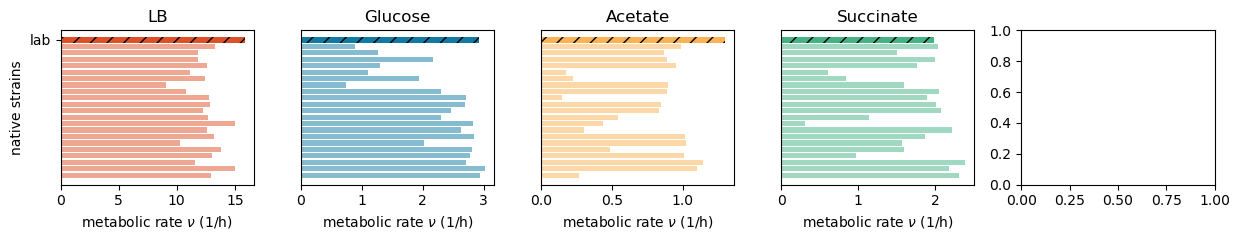

In [61]:

#do this for the same strains (and order as before)
strainlist=data["Strain"].unique()[:22]
print(strainlist)
hatchlist=[""]*len(strainlist)

#load information about metabolic rate
metabolicrate=pd.read_csv("../../data/estimated_metabolic_rate_all_strains.csv")

display(metabolicrate)
display(metabolicrate.index.unique())

#go through different carbon sources
fig,ax=plt.subplots(1,5,figsize=(5*2.5,2.5))
#fig2,ax2=plt.subplots(1,5,figsize=(5*2.5,2.5)) #for histograms
#fig3,ax3=plt.subplots(1,1,figsize=(1*2.5,2.)) #histogram all in one plot

#variation 
iS=-1
for carb in ["LB","Glucose","Acetate","Succinate"]:
    iS += 1
    colorcarb=colorlistcarb[carsource_list.index(carb)]
    select=metabolicrate.loc[metabolicrate["carbon_source"]==carb]
    select=select.groupby("Strain").mean()
    selectstd=select.groupby("Strain").std()
    
    
    select.loc[strainlist]
    print(select)
    #print(mean.loc[strainlist]["growth_rate"])
    #print(std.loc[strainlist]["growth_rate"])
    ax[iS].set_title(carb)
    ax[iS].barh(range(0,len(strainlist)),select.loc[strainlist]["estimated_nu_inv_hr"],color=colorcarb,alpha=alpha,capsize=capsize)
    
    ax[iS].barh(len(strainlist)-1,select.loc["NCM3722"]["estimated_nu_inv_hr"],color=colorcarb,alpha=1,hatch="//",capsize=capsize)
    
    
    if iS==0:
        ax[iS].set_ylabel("native strains")

    if iS==0:
        ax[iS].set_yticks([len(strainlist)-1])
        ax[iS].set_yticklabels(["lab"])
        ax[iS].set_ylabel("native strains")
    else:
        ax[iS].set_yticks([])
    ax[iS].set_xlabel('metabolic rate $\\nu$ (1/h)')
    #ax2[iS].hist(mean.loc[strainlist]["growth_rate"],color=colorcarb,alpha=alpha)
    #if carb != "LB":
    #    ax3.hist(mean.loc[strainlist]["growth_rate"],alpha=alpha,color=colorcarb,density=True,label=carb)
    #ax[iS].set_xlabel("growth rate (1/h)")
#ax3.set_ylabel("# strains")
#ax3.set_xlabel("growth rate (1/h)")
#ax3.legend()
fig.tight_layout()
#fig3.tight_layout()
#fig2.tight_layout()
#fig3.savefig("plot_output/metabolicrate_histogram.pdf")
#fig2.savefig("plot_output/gr_histogram_diff_carbon.pdf")
fig.savefig("plot_output/metabolicrate_diff_carbon.pdf")

['ECOR01' 'ECOR02' 'ECOR09' 'ECOR13' 'ECOR15' 'ECOR24' 'ECOR26' 'ECOR28'
 'ECOR35' 'ECOR36' 'ECOR38' 'ECOR39' 'ECOR41' 'ECOR42' 'ECOR51' 'ECOR53'
 'ECOR54' 'ECOR55' 'ECOR59' 'ECOR61' 'ECOR63' 'NCM3722' 'Isolate_1'
 'Isolate_2' 'Isolate_3' 'Isolate_4' 'Isolate_5' 'Isolate_6']
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
702   NaN
703   NaN
704   NaN
705   NaN
706   NaN
Name: R/P, Length: 707, dtype: float64


Date  growth_rate  growth_rate_2  glu_consumption  \
Strain  carbon_source                                                      
ECOR01  Acetate         NaN     0.106003            NaN              NaN   
        Fructose        NaN     0.804411            NaN              NaN   
        Glu+CAA         NaN     1.478800            NaN              NaN   
        Glu+CAA+ACGU    NaN     2.024798            NaN              NaN   
        Glucose         NaN     0.946285       0.235246         4.346994   
...                     ...          ...            ...              ...   
NCM3722 Mixed carbon    NaN     0.965707            NaN         4.444438   
        Succinate       NaN     0.684213            NaN              NaN   
        fru_glu         NaN     1.047003            NaN         4.451925   
        fru_mal         NaN     0.700593            NaN              NaN   
        mal_glu         NaN     0.963871            NaN         4.603511   

                       acetate_secretion  lag_time  fructose_consumption  \
Strain  carbon_source                                                      
ECOR01  Acetate                      NaN       NaN                   NaN   
        Fructose                     NaN       NaN                   NaN   
        Glu+CAA                      NaN       NaN                   NaN   
        Glu+CAA+ACGU                 NaN       NaN                   NaN   
        Glucose                -2.684193  0.785815                   NaN   
...                                  ...       ...                   ...   
NCM3722 Mixed carbon           -2.053538       NaN              0.793477   
        Succinate                    NaN       NaN                   NaN   
        fru_glu                -2.735808       NaN              0.547754   
        fru_mal                 0.000000       NaN              4.318056   
        mal_glu                -2.268808       NaN                   NaN   

                       maltose_consumption  Succinate_consumption  \
Strain  carbon_source                                               
ECOR01  Acetate                        NaN                    NaN   
        Fructose                       NaN                    NaN   
        Glu+CAA                        NaN                    NaN   
        Glu+CAA+ACGU                   NaN                    NaN   
        Glucose                        NaN                    NaN   
...                                    ...                    ...   
NCM3722 Mixed carbon              0.132097               1.199604   
        Succinate                      NaN                    NaN   
        fru_glu                        NaN                    NaN   
        fru_mal                  -0.125044                    NaN   
        mal_glu                   0.120499                    NaN   

                       glycerol_consumption  galactose_consumption  \
Strain  carbon_source                                                
ECOR01  Acetate                         NaN                    NaN   
        Fructose                        NaN                    NaN   
        Glu+CAA                         NaN                    NaN   
        Glu+CAA+ACGU                    NaN                    NaN   
        Glucose                         NaN                    NaN   
...                                     ...                    ...   
NCM3722 Mixed carbon               0.104671                    NaN   
        Succinate                       NaN                    NaN   
        fru_glu                         NaN                    NaN   
        fru_mal                         NaN                    NaN   
        mal_glu                         NaN                    NaN   

                       glu+CAA_consumption  glu+CAA+ACGU_consumption  \
Strain  carbon_source                                                  
ECOR01  Acetate                        NaN                       NaN   
        Fructose    

Date  growth_rate  growth_rate_2  glu_consumption  \
Strain  carbon_source                                                      
ECOR01  Acetate         NaN     0.003417            NaN              NaN   
        Fructose        NaN          NaN            NaN              NaN   
        Glu+CAA         NaN          NaN            NaN              NaN   
        Glu+CAA+ACGU    NaN          NaN            NaN              NaN   
        Glucose         NaN     0.009659            NaN              NaN   
...                     ...          ...            ...              ...   
NCM3722 Mixed carbon    NaN     0.011684            NaN              NaN   
        Succinate       NaN          NaN            NaN              NaN   
        fru_glu         NaN          NaN            NaN              NaN   
        fru_mal         NaN          NaN            NaN              NaN   
        mal_glu         NaN          NaN            NaN              NaN   

                       acetate_secretion  lag_time  fructose_consumption  \
Strain  carbon_source                                                      
ECOR01  Acetate                      NaN       NaN                   NaN   
        Fructose                     NaN       NaN                   NaN   
        Glu+CAA                      NaN       NaN                   NaN   
        Glu+CAA+ACGU                 NaN       NaN                   NaN   
        Glucose                      NaN       NaN                   NaN   
...                                  ...       ...                   ...   
NCM3722 Mixed carbon                 NaN       NaN                   NaN   
        Succinate                    NaN       NaN                   NaN   
        fru_glu                      NaN       NaN                   NaN   
        fru_mal                      NaN       NaN                   NaN   
        mal_glu                      NaN       NaN                   NaN   

                       maltose_consumption  Succinate_consumption  \
Strain  carbon_source                                               
ECOR01  Acetate                        NaN                    NaN   
        Fructose                       NaN                    NaN   
        Glu+CAA                        NaN                    NaN   
        Glu+CAA+ACGU                   NaN                    NaN   
        Glucose                        NaN                    NaN   
...                                    ...                    ...   
NCM3722 Mixed carbon                   NaN                    NaN   
        Succinate                      NaN                    NaN   
        fru_glu                        NaN                    NaN   
        fru_mal                        NaN                    NaN   
        mal_glu                        NaN                    NaN   

                       glycerol_consumption  galactose_consumption  \
Strain  carbon_source                                                
ECOR01  Acetate                         NaN                    NaN   
        Fructose                        NaN                    NaN   
        Glu+CAA                         NaN                    NaN   
        Glu+CAA+ACGU                    NaN                    NaN   
        Glucose                         NaN                    NaN   
...                                     ...                    ...   
NCM3722 Mixed carbon                    NaN                    NaN   
        Succinate                       NaN                    NaN   
        fru_glu                         NaN                    NaN   
        fru_mal                         NaN                    NaN   
        mal_glu                         NaN                    NaN   

                       glu+CAA_consumption  glu+CAA+ACGU_consumption  \
Strain  carbon_source                                                  
ECOR01  Acetate                        NaN                       NaN   
        Fructose    

/var/folders/4b/8dffvbfs5qs93rh77f2zxs340000gn/T/ipykernel_52928/643596998.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


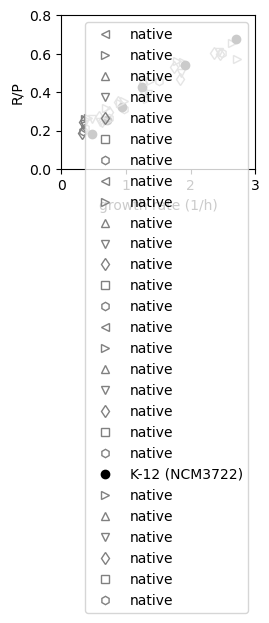

In [65]:
# Plot R/P line


strainlist=data["Strain"].unique()
print(strainlist)

print(data["R/P"])
mean=data.groupby(["Strain","carbon_source"]).mean(numeric_only=True)
std=data.groupby(["Strain","carbon_source"]).std(numeric_only=True)
display(mean)
display(std)

fig, ax = plt.subplots(figsize=(2.5, 2))

markerlist=["<",">","^","v","d","s","h"]*6
iS=-1
for strain in strainlist:
    iS += 1
    meanc=mean.loc[strain]
    stdc=std.loc[strain]
   
    
#    for carb in meanc[""]
    #ax.plot(meanc["growth_rate"],meanc["R/P"],marker=markerlist[iS],ls='',fillstyle='none',color="k")
    for carb in meanc.index:
        #color highlight
        if carb in carbhighlight:
            colorc=colorlistcarbhighlight[carbhighlight.index(carb)]
        else:
            colorc="gray"
        if strain != "NCM3722":
            if carb=="Glucose":
                label="native"
            else:
                label=None
            ax.plot(meanc["growth_rate"].loc[carb],meanc["R/P"].loc[carb],marker=markerlist[iS],ls='',fillstyle='none',color="gray",label=label)
        else:
            if carb=="Glucose":
                label="K-12 (NCM3722)"
            else:
                label=None
            ax.plot(meanc["growth_rate"].loc[carb],meanc["R/P"].loc[carb],marker='o',ls='',fillstyle='full',color="black",label=label)
            
ax.set_xlabel("growth rate (1/h)")
ax.set_ylabel("R/P")
ax.set_xlim(0,3)
ax.set_ylim(0,0.8)
ax.legend()
fig.tight_layout()
fig.savefig("plot_output/r_over_p.pdf")